In [61]:
import numpy as np
from Linear import *
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from MSELoss import *

In [62]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# Données de forme (442 exemples, 10 dimensions)
# On récupère une seule dimensions (la N°3), newaxis est fait pour qu'on ait pas un vecteur mais une matrice 442*1
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


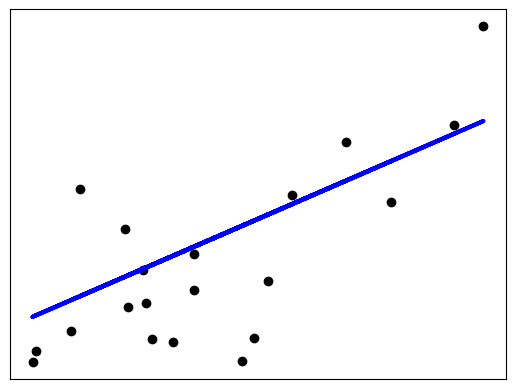

In [63]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Tests couche linéaire

### Passe forward

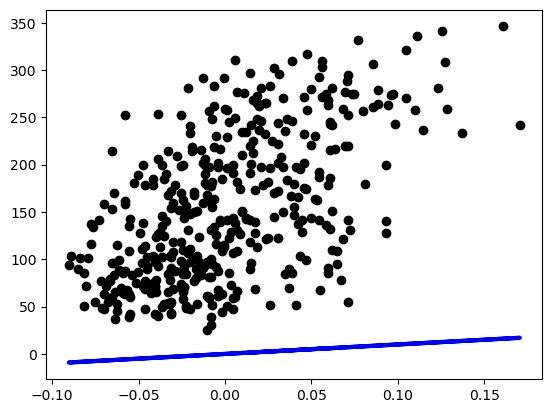

In [64]:
diabetes_y_train = diabetes_y_train.reshape(-1,1)
couche_lineaire = Linear(diabetes_X_train.shape[1], diabetes_y_train.shape[1])
output = couche_lineaire.forward(diabetes_X_train)


plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output, color="blue", linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

### Calculer le cout

In [65]:
mseloss = MSELoss()

cout = mseloss.forward(diabetes_y_train, output)
gradient_loss = mseloss.backward(diabetes_y_train, output) # le premier delta du backward
#print(gradient_loss)
print(f"{cout=}")


cout=array([29051.83377091])


### Mise à jour des parametres

In [66]:
couche_lineaire.backward_update_gradient(diabetes_X_train, delta=gradient_loss)
print(couche_lineaire._gradient)

[[-1663.37367075]]


In [67]:
couche_lineaire.backward_delta(diabetes_X_train , delta=gradient_loss)

array([[-28966.07586963],
       [-16029.48122478],
       [-27310.97573327],
       [-41431.9002901 ],
       [-27727.69384409],
       [-20213.91881   ],
       [-28543.25625887],
       [-12637.89411681],
       [-20766.07586963],
       [-61218.75694066],
       [-21876.1684691 ],
       [-13449.88177021],
       [-36376.80015375],
       [-37037.89411681],
       [-24112.13142931],
       [-34561.23773897],
       [-32354.08821622],
       [-28557.6629776 ],
       [-19610.34404863],
       [-33961.23773897],
       [-14737.26243216],
       [-10247.46270488],
       [-13681.00659976],
       [-47787.6321111 ],
       [-36083.42566509],
       [-40653.45653158],
       [-28946.83102024],
       [-15809.18835258],
       [-26625.9064634 ],
       [-56724.11908272],
       [-24910.97573327],
       [-13109.71236399],
       [-65694.25762245],
       [-18407.9249833 ],
       [-14266.59988103],
       [-21019.9126367 ],
       [-52542.10056282],
       [-54979.21921907],
       [-489

In [68]:
couche_lineaire.update_parameters(gradient_step=1e-3)

In [69]:
couche_lineaire._parameters

array([[101.66337367]])

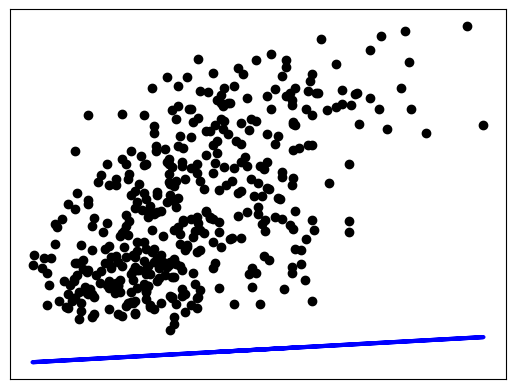

In [70]:
output2 = couche_lineaire.forward(diabetes_X_train)

# Plot outputs
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output2, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Nouveau cout

In [71]:
cout = mseloss.forward(diabetes_y_train, output2)
print(f'{cout=}')

cout=array([29045.28361093])


In [72]:
# Création d'un tableau de données exemple
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Division en groupes de tailles égales
groupes = np.array_split(data, 3)  # Divise en 3 groupes de tailles égales

# Affichage des groupes
for groupe in groupes:
    print(groupe)


[1 2 3 4]
[5 6 7]
[ 8  9 10]


In [73]:
# Création d'un tableau de données exemple
data = np.array(range(23))

# Taille de chaque groupe
taille_groupe = 4

# Nombre total de groupes
nombre_groupes = len(data) // taille_groupe + (1 if len(data) % taille_groupe != 0 else 0)

# Division en groupes selon la division euclidienne
groupes = np.array_split(data, nombre_groupes)

# Affichage des groupes
for groupe in groupes:
    print(groupe)


[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
[12 13 14 15]
[16 17 18 19]
[20 21 22]


## Boucle d'apprentissage

cout=array([27933.58061636])


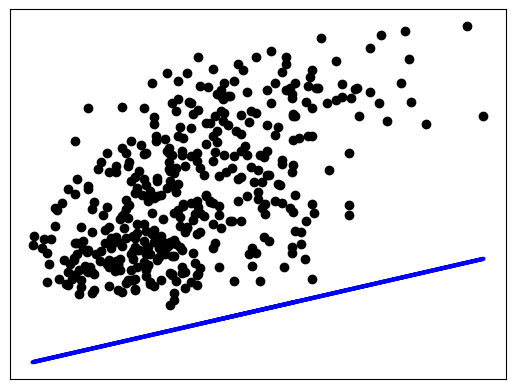

In [74]:


diabetes_y_train = diabetes_y_train.reshape(-1,1)
couche_lineaire = Linear(diabetes_X_train.shape[1], diabetes_y_train.shape[1])

while cout>28000:
    output = couche_lineaire.forward(diabetes_X_train)

    mseloss = MSELoss()

    cout = mseloss.forward(diabetes_y_train, output)
    gradient_loss = mseloss.backward(diabetes_y_train, output) # le premier delta du backward
    # print(f"{cout=}")
    couche_lineaire.backward_update_gradient(diabetes_X_train, delta=gradient_loss)
    couche_lineaire.update_parameters(gradient_step=1e-3)

print(f'{cout=}')

# Plot resultat par rapport au train
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()



cout=array([27933.58061636])


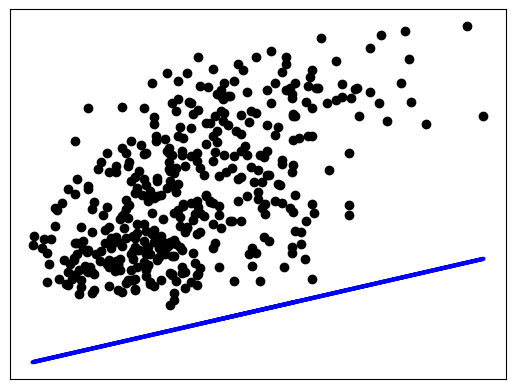

In [75]:


diabetes_y_train = diabetes_y_train.reshape(-1,1)
couche_lineaire = Linear(diabetes_X_train.shape[1], diabetes_y_train.shape[1])
cout=10**5
while cout>28000:
    output = couche_lineaire.forward(diabetes_X_train)

    mseloss = MSELoss()

    cout = mseloss.forward(diabetes_y_train, output)
    gradient_loss = mseloss.backward(diabetes_y_train, output) # le premier delta du backward
    # print(f"{cout=}")
    couche_lineaire.backward_update_gradient(diabetes_X_train, delta=gradient_loss)
    couche_lineaire.update_parameters(gradient_step=1e-3)

print(f'{cout=}')

# Plot resultat par rapport au train
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()



cout=array([27933.58061636])


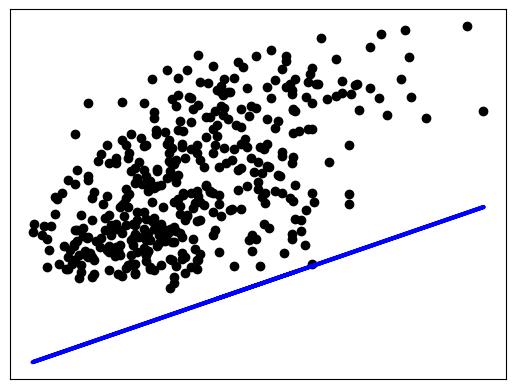

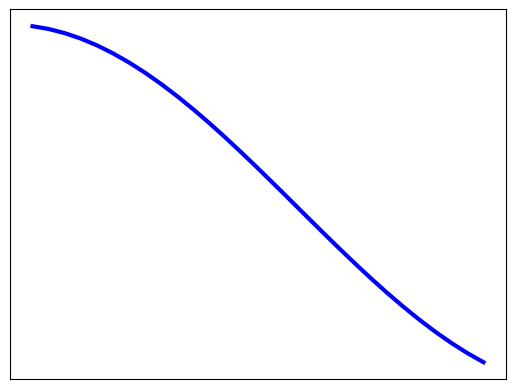

In [91]:
def boucle_apprentissage(data, y, seuil, eps=1e-3, nb_iter_max=10*3):
    couche_lineaire = Linear(data.shape[1], y.shape[1])
    grad=-10**3

    # Première passe forward
    output = couche_lineaire.forward(data)
    mseloss = MSELoss()
    cout = mseloss.forward(y, output) # calculer la loss (le cout) par rapport aux predictions
    nb_iter=1
    list_couts=[]

    while  cout>seuil and grad<eps and nb_iter<nb_iter_max:

        # Passe backward
        gradient_loss = mseloss.backward(y, output) # calculer la derivee de la loss par rapport aux predictions du modèle
        # print(f"{cout=}")

        couche_lineaire.backward_update_gradient(data, delta=gradient_loss) # calculer la derivee de la loss par rapport aux paramètres (W)
        couche_lineaire.backward_delta(data , delta=gradient_loss) # calculer la derivee de la loss par rapport aux sorties du module
        couche_lineaire.update_parameters(gradient_step=1e-3) # maj des paramètres (W) avec descente de gradient
        grad=couche_lineaire._gradient

        # Passe forward
        output = couche_lineaire.forward(data)
        mseloss = MSELoss()
        cout = mseloss.forward(y, output)
        list_couts.append(cout)
        # couche_lineaire.zero_grad()
        nb_iter +=1
    
    return output, list_couts, nb_iter

diabetes_y_train = diabetes_y_train.reshape(-1,1)
seuil=27500

output, list_couts, nb_iter=boucle_apprentissage(diabetes_X_train, diabetes_y_train, seuil)
print(f"{cout=}")

# Plot resultat par rapport au train
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.plot(diabetes_X_train, output, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# Courbe d'apprentissage
plt.plot(list(range(1, nb_iter)), list_couts, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
